### INNOMATICS RESEARCH LABS
#### Internship Test Part 2 - Machine Learning Hackathon

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Importing Dataset

In [2]:
df = pd.read_csv('dataframe_.csv')

df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


##### Exploratory Data Analysis & Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [16]:
df.isna().sum()

input     1
output    1
dtype: int64

In [22]:
df[df.isna().any(axis=1)]

,input,output
1439,NaN,NaN


In [24]:
new_df = df.dropna(axis=0)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc530e4d660>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc530e4dc00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc530e4c160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc530e4e1a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc530e4e470>],
 'means': []}

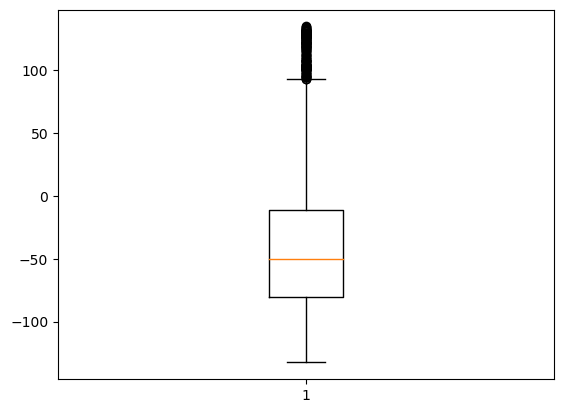

In [32]:
plt.boxplot(new_df['output'])

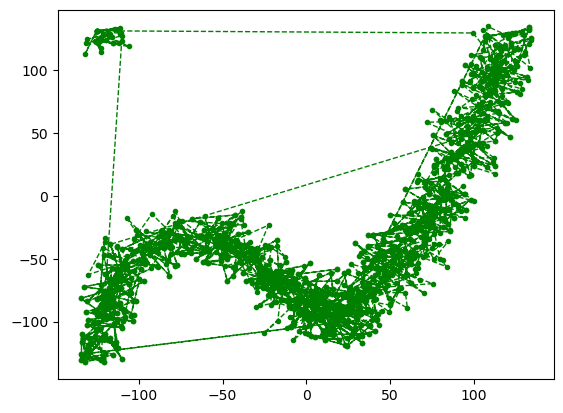

In [31]:
plt.plot(new_df['input'], new_df['output'], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)

In [39]:
outliers = new_df[(new_df['input'] < -100) & (new_df['output'] > 100)]

print(outliers.shape)
outliers

(39, 2)


,input,output
1072,-125.366669,131.000000
1073,-114.508654,132.424802
1074,-125.366669,131.000000
1075,-125.366669,131.000000
1076,-126.029114,123.060597
1077,-106.093619,118.532422
1078,-125.366669,131.000000
1079,-116.197531,126.190248
1080,-125.366669,131.000000
1081,-111.529664,133.579278


In [42]:
updated_df = new_df.drop(index=outliers.index, axis=0)

updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1657 non-null   float64
 1   output  1657 non-null   float64
dtypes: float64(2)
memory usage: 38.8 KB


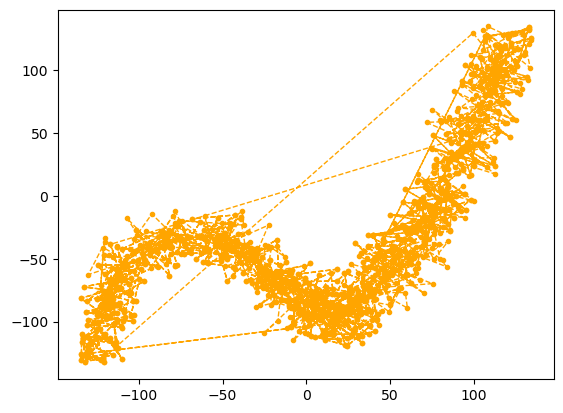

In [43]:
plt.plot(updated_df['input'], updated_df['output'], color='orange', marker='o', linestyle='dashed', linewidth=1, markersize=3)

##### Data Preprocessing

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(updated_df)
df_scaled = scaler.fit_transform(updated_df)
df_scaled

array([[4.53397413e-02, 6.93310327e-03],
       [4.98256047e-02, 9.30582670e-03],
       [1.69973794e-04, 8.54545579e-03],
       ...,
       [6.18010263e-01, 1.70217594e-01],
       [6.08580851e-01, 1.02976786e-01],
       [5.64265003e-01, 1.15029199e-01]])

In [46]:
df_s = pd.DataFrame(df_scaled, columns=['input', 'output'])
df_s

,input,output
0,0.045340,0.006933
1,0.049826,0.009306
2,0.000170,0.008545
3,0.053259,0.024963
4,0.018801,0.073589
...,...,...
1652,0.594925,0.210012
1653,0.610235,0.185968
1654,0.618010,0.170218
1655,0.608581,0.102977


In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_s['input'], df_s['output'], test_size=0.2, random_state=42)

##### Modelling

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(np.array(x_train).reshape(-1, 1), y_train)

LinearRegression()

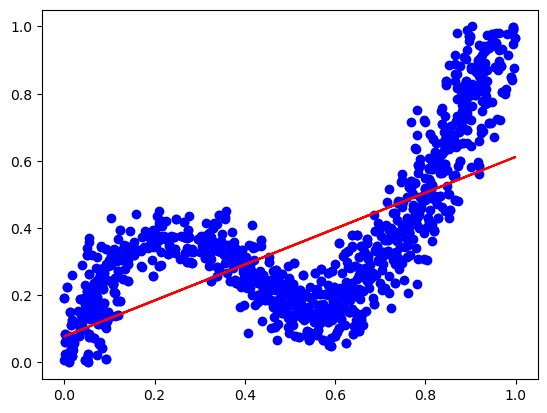

In [66]:
plt.scatter(x_train, y_train, color='blue', marker='o')
plt.plot(x_train, lin_reg.predict(np.array(x_train).reshape(-1, 1)), color='red')

In [62]:
y_pred = lin_reg.predict(np.array(x_test).reshape(-1, 1))

mse_lin = mean_squared_error(y_test, y_pred)
mse_lin

0.03091003744546383

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(np.array(x_train).reshape(-1, 1))

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(x_poly, y_train)

LinearRegression()

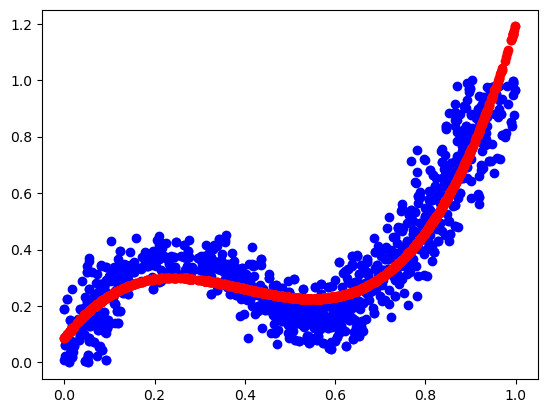

In [86]:
plt.scatter(x_train, y_train, color='blue', marker='o')
plt.scatter(x_train, poly_lin_reg.predict(poly_reg.fit_transform(np.array(x_train).reshape(-1, 1))), color='red')

In [87]:
y_pred_poly = poly_lin_reg.predict(poly_reg.fit_transform(np.array(x_test).reshape(-1, 1)))

mse_lin = mean_squared_error(y_test, y_pred_poly)
mse_lin

0.007888076838967332

Polynomial Regression with degree 3 perform much better than linear regression as seen from performance matric 'Mean Square Error (MSE)', where linear regression gives MSE of 0.03 on test data, while Polynomial Regression of degree 3 gives MSE of 0.007.

As we can see from the scatter plot of data, the data has a polynomial nature hence, plynomaial regression works better on this data.